In [120]:
import numpy as np
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [121]:
# check for missing values
train.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [122]:
#Assessing basic structure of the data and correlations with target variable
train.describe()
train.corr()['rainfall'].abs().sort_values(ascending=False)

rainfall         1.000000
cloud            0.641191
sunshine         0.555287
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
maxtemp          0.079304
pressure         0.049886
temparature      0.049660
id               0.033674
mintemp          0.026841
winddirection    0.006939
day              0.000462
Name: rainfall, dtype: float64

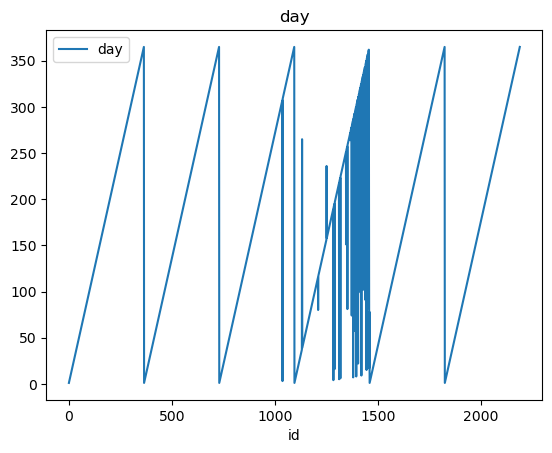

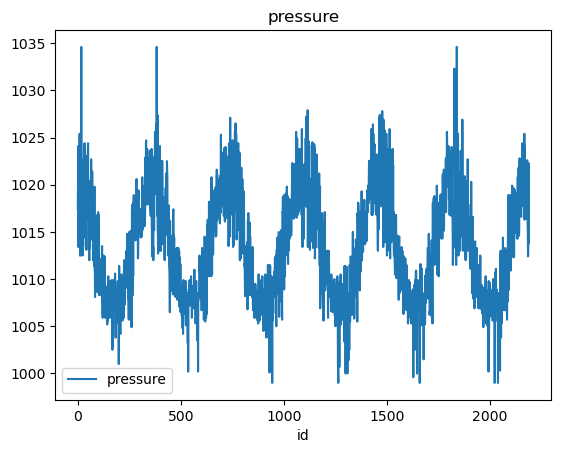

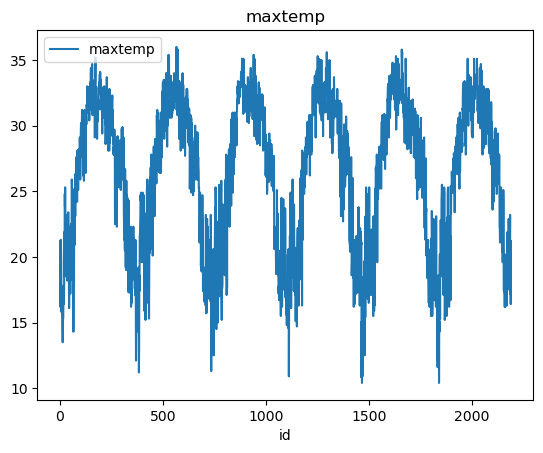

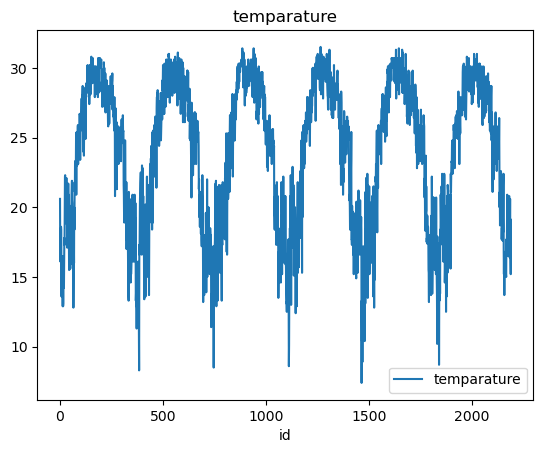

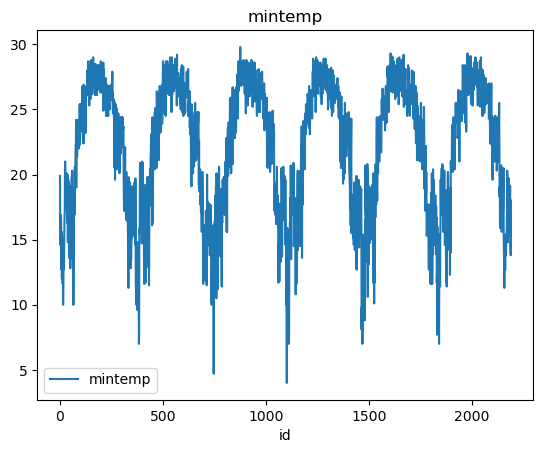

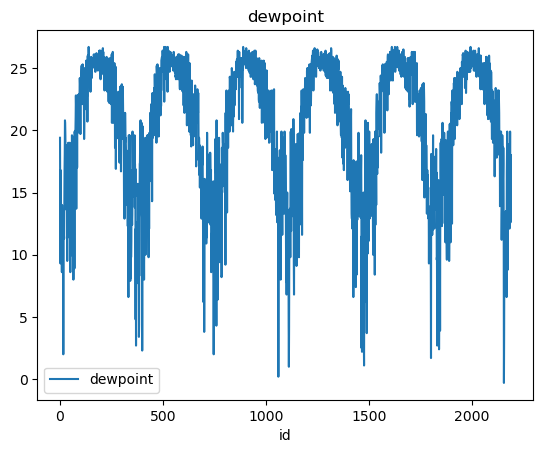

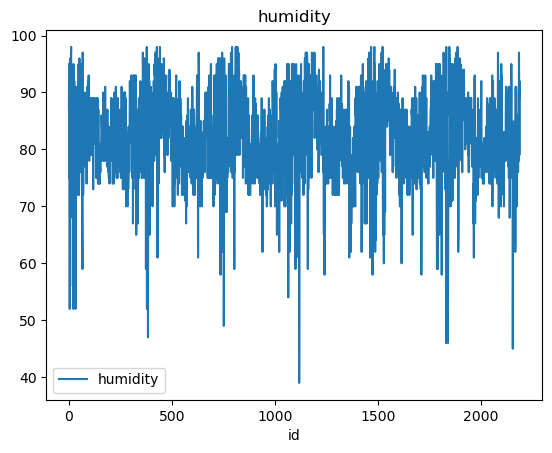

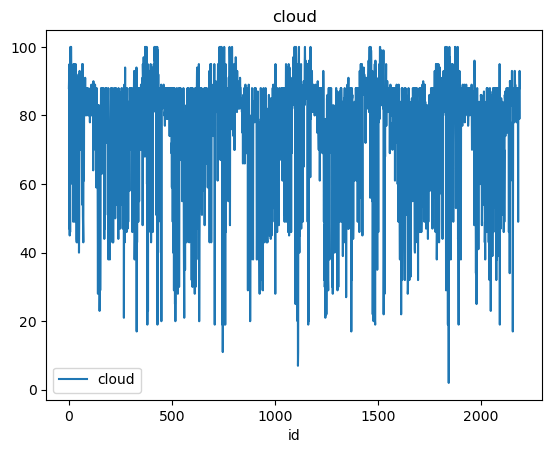

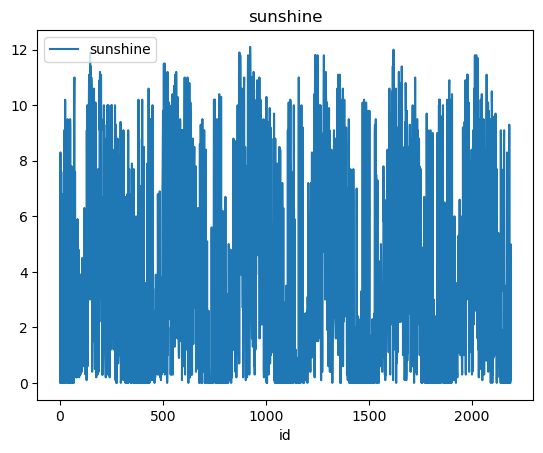

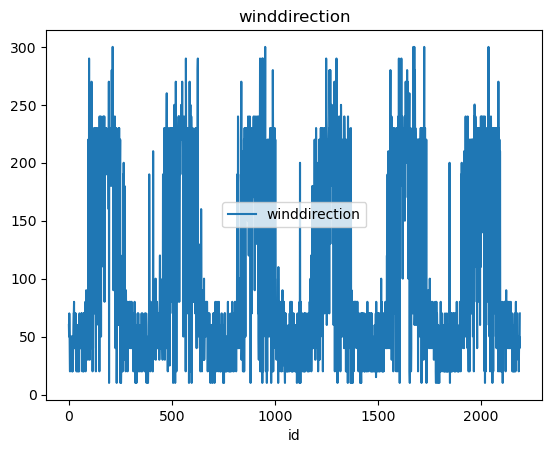

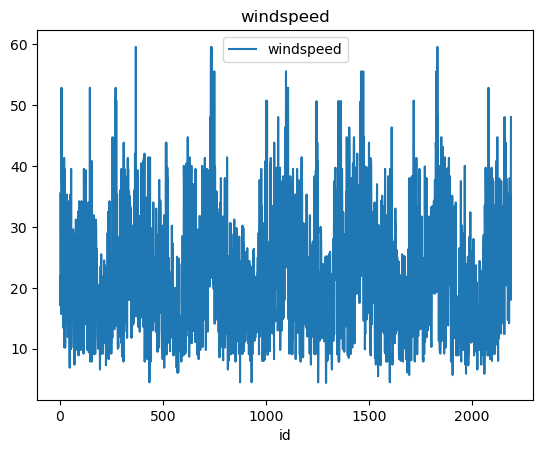

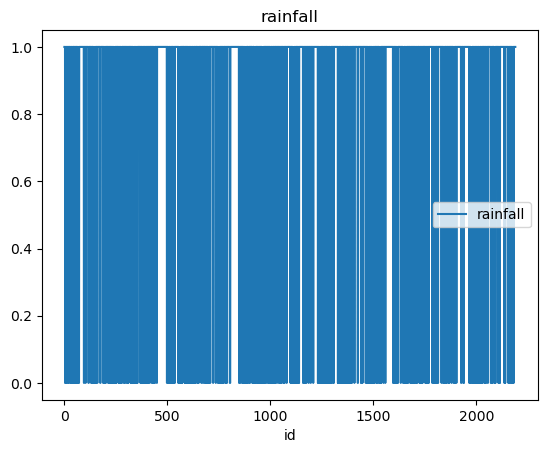

In [123]:
# plot features over time to see if there is a pattern
import matplotlib.pyplot as plt
# id is the index so use as x-axis
for col in train.columns[1:]:
    train.plot(x='id', y=col)
    plt.title(col)
    plt.show()

C:\Users\Tijn\AppData\Local\Temp\ipykernel_8472\2588410941.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['day'][i] = train['id'][i] % 365 + 1
C:\Users\Tijn\AppData\Local\Temp\ipykernel_8472\2588410941.py:5: SettingWithCopyWarning

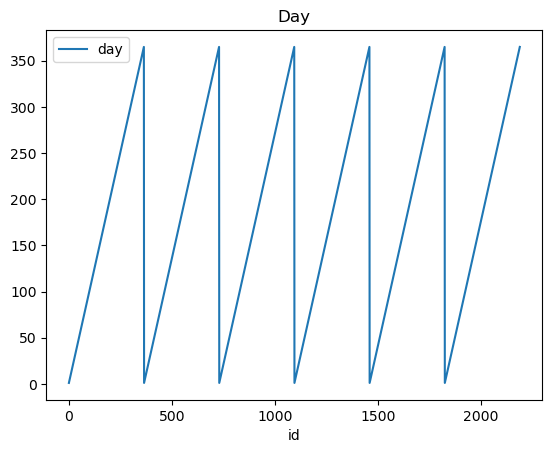

In [124]:
# mislabeled day data
for i, day in enumerate(train['day']):
    if day != train['id'][i] % 365 + 1:
        # fix the day variable
        train['day'][i] = train['id'][i] % 365 + 1

# plot the day variable over time (id)
train.plot(x='id', y='day')
plt.title('Day')
plt.show()


In [125]:
# feature engineering

# combining the two datasets
df = pd.concat([train, test], axis=0, ignore_index=True)

# day variable: seasonality, year

df['year'] = df['id'] // 365
df['season'] = df['id'] // 91.25 % 4
df['month'] = df['id'] % 365 // 30.4166666

# change the season to winter, spring, summer, fall; change month to jan, feb, mar, etc.
df['season'] = df['season'].map({0: 'winter', 1: 'spring', 2: 'summer', 3: 'fall'})
df['month'] = df['month'].map({0: 'jan', 1: 'feb', 2: 'mar', 3: 'apr', 4: 'may', 5: 'jun', 6: 'jul', 7: 'aug', 8: 'sep', 9: 'oct', 10: 'nov', 11: 'dec'})
# one-hot encoding the season and month
df = pd.get_dummies(df, columns=['season', 'month'], prefix=['', ''], prefix_sep=['', ''])
df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall', 'year', 'fall', 'spring', 'summer', 'winter',
       'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

In [126]:
# export the data to a csv: train_processed.csv and test_processed.csv
df.loc[train['id']].to_csv('train_processed.csv')
df.loc[test['id']].to_csv('test_processed.csv')